In [46]:
import zipfile
import os

base_dir = "../input/bnp-paribas-cardif-claims-management/train.csv.zip"

with zipfile.ZipFile(base_dir, 'r') as z:
    z.extractall()

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
data = pd.read_csv("./train.csv", nrows=10000)

In [21]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data = data.select_dtypes(include=numerics)
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [23]:
data = data.fillna(0)
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,0.000000,9.191265,0.000000,0.000000,2.301630,0.000000,...,0.000000,0.000000,0.000000,0.598896,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
X = data.loc[:, "v1":"v131"]
y = data["target"]

In [31]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [32]:
bag_clf = BaggingClassifier(n_estimators=100, n_jobs=4, random_state=42)
bag_clf.fit(X, y)

BaggingClassifier(n_estimators=100, n_jobs=4, random_state=42)

In [33]:
rnd_frst_clf = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=42)
rnd_frst_clf.fit(X, y)

RandomForestClassifier(n_jobs=4, random_state=42)

In [36]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [42]:
cvs_dt = cross_val_score(dt_clf, X, y, cv=skf, scoring='accuracy')
cvs_bag = cross_val_score(bag_clf, X, y, cv=skf, scoring='accuracy')
cvs_rnd_frst = cross_val_score(rnd_frst_clf, X, y, cv=skf, scoring='accuracy')

In [43]:
print(f"DecisionTreeClassifier cross_val_score: {cvs_dt}, \t mean: {np.mean(cvs_dt)}")
print(f"BaggingClassifier cross_val_score: {cvs_bag}, \t\t mean: {np.mean(cvs_bag)}")
print(f"RandomForestClassifier cross_val_score: {cvs_rnd_frst}, \t mean: {np.mean(cvs_rnd_frst)}")

DecisionTreeClassifier cross_val_score: [0.65746851 0.64866487 0.66666667], 	 mean: 0.6576000131506851
BaggingClassifier cross_val_score: [0.74955009 0.74887489 0.7479748 ], 		 mean: 0.7487999249835001
RandomForestClassifier cross_val_score: [0.75344931 0.75367537 0.75487549], 	 mean: 0.7540000550744937


На основании полученных результатов, можно сделать вывод, что лучше всего классифицировал $-$ случайный лес.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [55]:
rnd_frst_clf_huge = RandomForestClassifier(n_jobs=4, random_state=42, warm_start=True)

In [56]:
accuracy_results = []

for i in range(20, 1020, 20):
    rnd_frst_clf_huge.set_params(n_estimators=i)
    rnd_frst_clf_huge.fit(X_train, y_train)
    accuracy_results.append(accuracy_score(rnd_frst_clf_huge.predict(X_test), y_test))

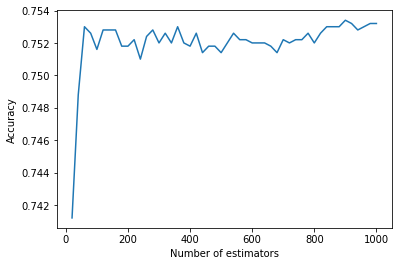

In [67]:
x = list(range(20, 1020, 20))
plt.plot(x, accuracy_results)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

На графике можно видеть, что для некоторых значений `n_estimators` имеет место переобучение.

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
xdg_clf = XGBClassifier(random_state=42, n_jobs=4)

In [90]:
param = {"learning_rate": [0.01, 0.1, 1], "max_depth": [3, 5, 10], "n_estimators": [10, 100, 500, 1000]}

gs_xdg_clf = GridSearchCV(xdg_clf,
                          param_grid=param,
                          scoring='accuracy',
                          n_jobs=4,
                          cv=skf)

In [ ]:
gs_xdg_clf.fit(X, y)

In [ ]:
print(f"Best param: {gs_xdg_clf.best_params_}")
print(f"Accuracy score: {gs_xdg_clf.score(X, y)}")